# Data Cyborgs - Machine Learning Demo

In [10]:
# For wrapping text in cell output
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


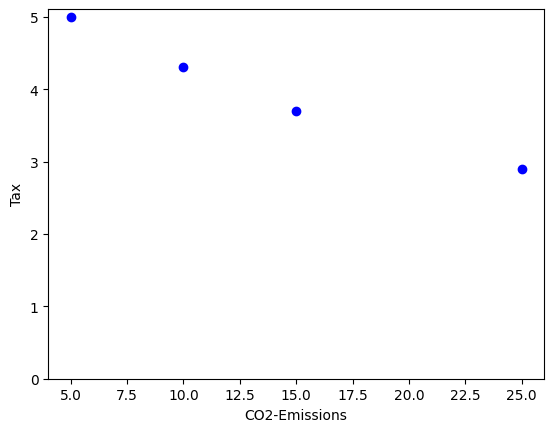

In [ ]:
# Input training data
X = np.array([5,10,15,25])
Y = np. array([5,4.3,3.7,2.9])

# Plot Data
plt.plot(X,Y, 'bo')
plt.ylabel('Tax')
plt.xlabel('CO2-Emissions')
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Initialize weights
W = -10 * np.random.random_sample()
b = 5

print(W,b)

# Plot the initial line
plt.plot(X,Y, 'bo')
x = np.linspace(0,30,100)
y = W*x+b
plt.plot(x, y, '-r', label='y=Wx+b')
plt.title('Graph of y=Wx+b')
plt.ylabel('Tax')
plt.xlabel('CO2-Emissions')
plt.ylim(ymin=0)
plt.show()


NameError: name 'np' is not defined

In [ ]:
# Train the model
num_iter = 200 # Number of gradient descent steps
learning_rate = 0.0001

loss_hist = []
for i in range(num_iter): # This is the gradient descent training loop
    Y_pred = W*X + b
    loss = 1/len(X)*np.sum((Y_pred - Y)**2)
    dw = 2/len(X)*np.sum((Y_pred - Y) * X)
    db = 2/len(X)*np.sum(Y_pred- Y)
    W = W - learning_rate * dw
    b = b - learning_rate * db
    loss_hist.append(loss)

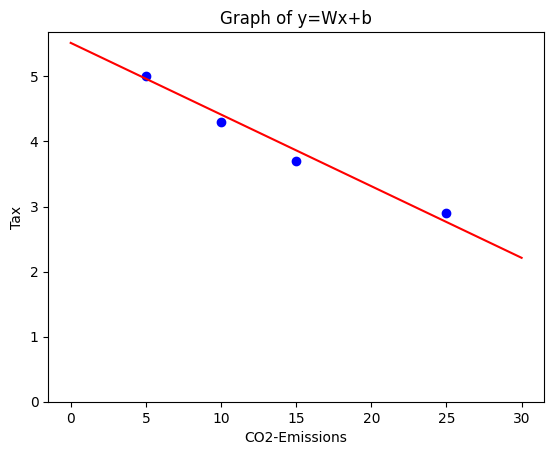

In [ ]:
# Plot the final line

plt.plot(X,Y, 'bo')
x = np.linspace(0,30,100)
y = W*x+b
plt.plot(x, y, '-r', label='y=Wx+b')
plt.title('Graph of y=Wx+b')
plt.ylabel('Tax')
plt.xlabel('CO2-Emissions')
plt.ylim(ymin=0)
plt.show()

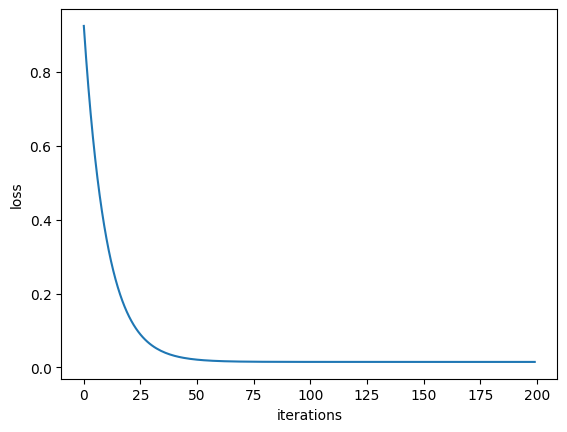

In [ ]:
# Plot the loss history

plt.plot(loss_hist)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [ ]:
print(loss)

0.015594949926799072


## Fine-tuning a Language Model
For a model that doesn't require a wait time for permission: https://huggingface.co/google/gemma-1.1-2b-it

In [2]:
import torch
from huggingface_hub import login
login()

In [28]:
# Clear GPU cache
import gc
gc.collect()
torch.cuda.empty_cache()

# Clear hard disk cache
!rm -rf /content/cache

### Generating Text

In [52]:
# Download model
from transformers import pipeline
# model_id = "meta-llama/Llama-3.2-1B-Instruct"
# model_id = "meta-llama/Llama-3.2-3B-Instruct"
# model_id = 'arputtick/llama_3.2_1B_Haraway'
# model_id = 'arputtick/llama_3.2_1B_EcoFem'
# model_id = 'arputtick/llama_3.2_1B_EcoFem_checkpoint200'

# For cached model
# model_id = "./results/checkpoint-200"
# model_id = "./fine-tuned-model"

model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_id)


from transformers import pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    temperature = 0.9, # Higher temperature make less probable tokens more likely
    # do_sample = False, # If false, should make model deterministic.
    top_p = 0.95, # The most probable words adding up to total of 95% will be sampled.
    # repetition_penalty = 1.1
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--arputtick--llama_3.2_1B_Haraway/snapshots/38493f608841e8dd6c2e07624ad9b7b373282d72/config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "bfloat16",


In [53]:
## Run this cell to input system and user prompt and generate text
import ipywidgets as widgets

# Create two textarea widgets
textarea1 = widgets.Textarea(
    value='',
    placeholder='Enter system prompt.',
    description='System:',
    layout=widgets.Layout(width='50%', height='100px')
)

textarea2 = widgets.Textarea(
    value='',
    placeholder='Enter user prompt.',
    description='User:',
    layout=widgets.Layout(width='50%', height='100px')
)

# Create a button widget
button = widgets.Button(
    description='Submit',
    button_style='success'
)

# Define the button click event
def on_button_click(b):
    system = textarea1.value
    user = textarea2.value
    # Generating text
    messages = [
    {"role": "system", "content": system },
    {"role": "user", "content": user},
    ]
    print("\n\nGenerating text...")
    outputs = pipe(
        messages,
        max_new_tokens=500,
        do_sample=True
    )
    print(outputs[0]["generated_text"][-1]['content'])
    return

button.on_click(on_button_click)

# Display the widgets
display(textarea1, textarea2, button)

Textarea(value='', description='System:', layout=Layout(height='100px', width='50%'), placeholder='Enter syste…

Textarea(value='', description='User:', layout=Layout(height='100px', width='50%'), placeholder='Enter user pr…

Button(button_style='success', description='Submit', style=ButtonStyle())



Generating text...
I am a computer program and do not have a physical presence or personal relationships. I exist solely to process and generate text, answer questions, and assist with tasks to the best of my abilities. I do not have feelings, emotions, or consciousness like humans do.

In a sense, I am a type of artificial intelligence designed to simulate conversation, answer questions, and provide information. I do not have a physical body that would allow me to interact with the world in the same way that a human would.


Generating text...
I relate to the world through conversations, interactions, and my training data. I'm designed to understand and generate human-like language, allowing me to communicate with people in various contexts. Here's a brief overview of my capabilities and limitations:

**Capabilities:**

1. **Knowledge base:** My training data is sourced from a massive corpus of text, which includes a vast array of topics, books, articles, and websites.
2. **Language

### Fine-tuning

In [3]:
## Load model

from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import torch

model_id = "meta-llama/Llama-3.2-1B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float32, device_map="auto") # Must be float32 for MacBooks!
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token

#### Prepare the data

In [5]:
%pip install -U datasets
# !pip install gdown -q

from datasets import load_dataset
# from google.colab import drive
# drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [5]:
# Load the training dataset
dataset = load_dataset("text", data_files = 'combined.txt', split="train")

# Define a function to apply the chat template
def apply_chat_template(example):
    text = example['text'].split(" ")
    input = " ".join(text[0:len(text)//2])
    response = " ".join(text[len(text)//2:])
    messages = [
        {"role": "user", "content": input},
        {"role": "assistant", "content": response}
    ]
    prompt = tokenizer.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    return {"prompt": prompt}

# Apply the chat template function to the dataset
new_dataset = dataset.train_test_split(0.20) # Let's use 80% of the data for training
new_dataset = new_dataset.map(apply_chat_template)

# Tokenize the data
def tokenize_function(example):
    tokens = tokenizer(example['prompt'], padding="max_length", truncation=True, max_length=128)
    # Set padding token labels to -100 to ignore them in loss calculation
    tokens['labels'] = [
        -100 if token == tokenizer.pad_token_id else token for token in tokens['input_ids']
    ]
    return tokens

# Apply tokenize_function to each row
tokenized_dataset = new_dataset.map(tokenize_function)
tokenized_dataset = tokenized_dataset.remove_columns(['text', 'prompt'])

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/25496 [00:00<?, ? examples/s]

Map:   0%|          | 0/6375 [00:00<?, ? examples/s]

Map:   0%|          | 0/25496 [00:00<?, ? examples/s]

Map:   0%|          | 0/6375 [00:00<?, ? examples/s]

#### Fine-tune the model

In [6]:
# Define training arguments
model.train()
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="steps", # To evaluate during training
    eval_steps=100,
    logging_steps=100,
    save_steps=200,
    save_total_limit=2,  # Keeps only the last two checkpoints
    per_device_train_batch_size=8, # Adjust based on your hardware
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=8,
    num_train_epochs=1, # How many times to loop through the dataset
    fp16=False, # Must be False for MacBooks
    report_to="none", # Here we can use something like tensorboard to see the training metrics
    log_level="info",
    learning_rate=1e-6, # Would avoid larger values here
    max_grad_norm=2 # Clipping the gradients is always a good idea
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer)

# Train the model
trainer.train()

# Save the model and tokenizer
trainer.save_model("./fine-tuned-model")
tokenizer.save_pretrained("./fine-tuned-model")

<ipython-input-6-e740ccb700bf>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
***** Running training *****
  Num examples = 25,496
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 8
  Total optimization steps = 398
  Number of trainable parameters = 1,235,814,400


Step,Training Loss,Validation Loss
100,1.806600,1.628847
200,1.657000,1.581180
300,1.610500,1.549557



***** Running Evaluation *****
  Num examples = 6375
  Batch size = 8

***** Running Evaluation *****
  Num examples = 6375
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Configuration saved in ./results/checkpoint-200/generation_config.json
Model weights saved in ./results/checkpoint-200/model.safetensors
tokenizer config file saved in ./results/checkpoint-200/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-200/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 6375
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-398
Configuration saved in ./results/checkpoint-398/config.json
Configuration saved in ./results/checkpoint-398/generation_config.json
Model weights saved in ./results/checkpoint-398/model.safetensors
tokenizer config file saved in ./results/checkpoint-398/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-398/s

('./fine-tuned-model/tokenizer_config.json',
 './fine-tuned-model/special_tokens_map.json',
 './fine-tuned-model/tokenizer.json')

In [18]:
tokenizer.push_to_hub("llama_3.2_1B_EcoFem_checkpoint200")
model.push_to_hub("llama_3.2_1B_EcoFem_checkpoint200")

tokenizer config file saved in /tmp/tmp24vpbwr3/tokenizer_config.json
Special tokens file saved in /tmp/tmp24vpbwr3/special_tokens_map.json
Uploading the following files to arputtick/llama_3.2_1B_EcoFem_checkpoint200: README.md,tokenizer.json,tokenizer_config.json,special_tokens_map.json


tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

Configuration saved in /tmp/tmpgbtec4_r/config.json
Configuration saved in /tmp/tmpgbtec4_r/generation_config.json
Model weights saved in /tmp/tmpgbtec4_r/model.safetensors
Uploading the following files to arputtick/llama_3.2_1B_EcoFem_checkpoint200: README.md,generation_config.json,model.safetensors,config.json


model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/arputtick/llama_3.2_1B_EcoFem_checkpoint200/commit/c147a0b72d6e81213a565d7556d291b7862fb187', commit_message='Upload LlamaForCausalLM', commit_description='', oid='c147a0b72d6e81213a565d7556d291b7862fb187', pr_url=None, repo_url=RepoUrl('https://huggingface.co/arputtick/llama_3.2_1B_EcoFem_checkpoint200', endpoint='https://huggingface.co', repo_type='model', repo_id='arputtick/llama_3.2_1B_EcoFem_checkpoint200'), pr_revision=None, pr_num=None)